In [150]:
import torch
import torchvision
from torch import nn


class AE(nn.Module):
    def __init__(self, **kwargs):
        super(AE, self).__init__()
        self.encoder = nn.Sequential(
            nn.Linear(in_features=kwargs["input_shape"], out_features=512),
            nn.ReLU(True), 
            nn.Linear(512, 256), 
            nn.ReLU(True), 
            nn.Linear(256, 256))
        self.decoder = nn.Sequential(
            nn.Linear(256, 256),
            nn.ReLU(True),
            nn.Linear(256, 512),
            nn.ReLU(True), 
            nn.Linear(512, out_features=kwargs["input_shape"]), 
            )

    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x
    

#class AE(nn.Module):
#    def __init__(self, **kwargs):
#        super().__init__()
#        self.encoder_hidden_layer = nn.Linear(
#            in_features=kwargs["input_shape"], out_features=128
#        )
#        self.encoder_output_layer = nn.Linear(
#            in_features=128, out_features=128
#        )
#        self.decoder_hidden_layer = nn.Linear(
#            in_features=128, out_features=128
#        )
#        self.decoder_output_layer = nn.Linear(
#            in_features=128, out_features=kwargs["input_shape"]
#        )

#    def forward(self, features):
#        activation = self.encoder_hidden_layer(features)
#        activation = torch.relu(activation)
#        code = self.encoder_output_layer(activation)
#        code = torch.relu(code)
#        activation = self.decoder_hidden_layer(code)
#        activation = torch.relu(activation)
#        activation = self.decoder_output_layer(activation)
#        reconstructed = torch.relu(activation)
#        return reconstructed

In [151]:

#  use gpu if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)
# create a model from `AE` autoencoder class
# load it to the specified device, either gpu or cpu
model = AE(input_shape=784).to(device)

# create an optimizer object
# Adam optimizer with learning rate 1e-3
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)

# mean-squared error loss
criterion = nn.MSELoss()

cuda


In [152]:
transform = torchvision.transforms.Compose([torchvision.transforms.ToTensor()])

#train_dataset = torchvision.datasets.MNIST(
#    root="~/torch_datasets", train=True, transform=transform, download=True
#)

#test_dataset = torchvision.datasets.MNIST(
#    root="~/torch_datasets", train=False, transform=transform, download=True
#)

train_dataset = torchvision.datasets.FashionMNIST(
    root="~/torch_datasets", train=True, transform=transform, download=True
)

test_dataset = torchvision.datasets.FashionMNIST(
    root="~/torch_datasets", train=False, transform=transform, download=True
)


train_loader = torch.utils.data.DataLoader(
    train_dataset, batch_size=128, shuffle=True, num_workers=4, pin_memory=True
)

test_loader = torch.utils.data.DataLoader(
    test_dataset, batch_size=32, shuffle=False, num_workers=4
)

In [153]:
epochs = 10
for epoch in range(epochs):
    loss = 0
    for batch_features, _ in train_loader:
        # reshape mini-batch data to [N, 784] matrix
        # load it to the active device
        batch_features = batch_features.view(-1, 784).to(device)
        
        # reset the gradients back to zero
        # PyTorch accumulates gradients on subsequent backward passes
        optimizer.zero_grad()
        
        # compute reconstructions
        outputs = model(batch_features)
        
        # compute training reconstruction loss
        train_loss = criterion(outputs, batch_features)
        
        # compute accumulated gradients
        train_loss.backward()
        
        # perform parameter update based on current gradients
        optimizer.step()
        
        # add the mini-batch training loss to epoch loss
        loss += train_loss.item()
    
    # compute the epoch training loss
    loss = loss / len(train_loader)
    
    # display the epoch training loss
    print("epoch : {}/{}, loss = {:.6f}".format(epoch + 1, epochs, loss))

epoch : 1/10, loss = 0.030022
epoch : 2/10, loss = 0.016518
epoch : 3/10, loss = 0.013812
epoch : 4/10, loss = 0.012234
epoch : 5/10, loss = 0.011231
epoch : 6/10, loss = 0.010482
epoch : 7/10, loss = 0.009862
epoch : 8/10, loss = 0.009423
epoch : 9/10, loss = 0.008939
epoch : 10/10, loss = 0.008637


In [154]:
test_dataset = torchvision.datasets.FashionMNIST(
    root="~/torch_datasets", train=False, transform=transform, download=True
)

test_loader = torch.utils.data.DataLoader(
    test_dataset, batch_size=10, shuffle=False
)

test_examples = None

with torch.no_grad():
    for batch_features in test_loader:
        batch_features = batch_features[0]
        batch_features = batch_features.to(device)  # missing line from original code
        test_examples = batch_features.view(-1, 784)
        reconstruction = model(test_examples)
        break

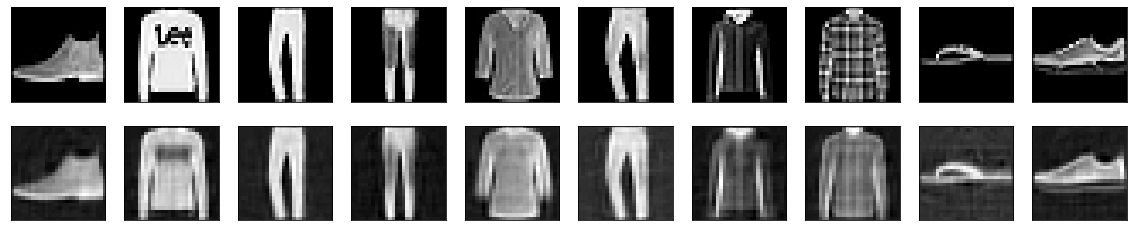

In [155]:
import matplotlib.pyplot as plt

with torch.no_grad():
    number = 10
    plt.figure(figsize=(20, 4))
    for index in range(number):
        # display original
        ax = plt.subplot(2, number, index + 1)
        plt.imshow(test_examples[index].cpu().numpy().reshape(28, 28))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

        # display reconstruction
        ax = plt.subplot(2, number, index + 1 + number)
        plt.imshow(reconstruction[index].cpu().numpy().reshape(28, 28))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
    plt.show()

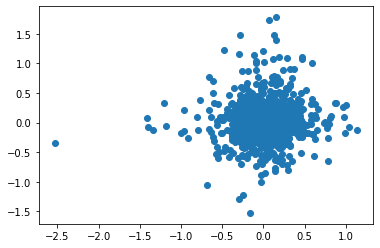

In [156]:
with torch.no_grad():
    for batch_features in test_loader:
        batch_features = batch_features[0]
        batch_features = batch_features.to(device)  # missing line from original code
        test_examples = batch_features.view(-1, 784)
        latent = model.encoder(test_examples)
        break
        
points = latent.cpu().numpy().reshape(-1, 2)        
plt.scatter(points[:,0], points[:,1])
plt.show()

In [157]:
latent#.cpu().numpy().reshape(-1, 2)[:,0]

tensor([[-0.0389, -0.2281,  0.0355,  ...,  0.0527,  0.0838,  0.0280],
        [-0.4167, -0.5838, -0.0381,  ..., -0.0292,  0.1842,  0.0575],
        [-0.2829, -0.0946, -0.3270,  ...,  0.0161, -0.4818, -0.4791],
        ...,
        [-0.2340,  0.1132,  0.2118,  ...,  0.0484, -0.0019,  0.1001],
        [ 0.1635, -0.0764,  0.1273,  ...,  0.0325, -0.0104,  0.0074],
        [-0.0247, -0.1521,  0.1096,  ..., -0.0535, -0.0306,  0.2276]],
       device='cuda:0')

In [158]:
#generated_image = model.decoder(torch.randn(2).to(device))
generated_image = model.decoder(torch.Tensor([1,1]).to(device))
plt.imshow(generated_image.detach().cpu().numpy().reshape(28, 28))
plt.gray()
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
plt.show()

RuntimeError: size mismatch, m1: [1 x 2], m2: [256 x 256] at /pytorch/aten/src/THC/generic/THCTensorMathBlas.cu:290